In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.io import savemat
from scipy.ndimage.interpolation import zoom

In [2]:
data = loadmat('./data/data.mat')

In [3]:
I_REF, I_HS, I_MS = data['I_REF'], data['I_HS'], data['I_MSI']

In [4]:
print(I_REF.shape, I_HS.shape, I_MS.shape)

(420, 300, 191) (84, 60, 191) (420, 300, 4)


In [5]:
# HS上采样，大小和MS保持一致
I_HS2 = zoom(I_HS, zoom=(5,5,1), order=1) 
# 将HS和MS拼接产生一份数据
integral_data = np.concatenate((I_HS2, I_MS), axis=2)

In [6]:
integral_data.shape

(420, 300, 195)

In [7]:
# 将HS和MS拼接后的图像按照step=1切割成100*100的图像集，类似的切割I_REF
input_size = (100,100,195)
tem1 = []
tem2 = []
for i in range(420-input_size[0]+1):
    for j in range(300-input_size[1]+1):
        tem1.append(integral_data[i:i+input_size[0],j:j+input_size[1],:])
        tem2.append(I_REF[i:i+input_size[0],j:j+input_size[1],:])

In [8]:
tem2[0].shape

(100, 100, 191)

In [9]:
len(tem1), len(tem2)

(64521, 64521)

In [10]:
len(tem1[-10:])

10

In [11]:
model = tf.keras.models.load_model('./pcnn_model2.h5')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1010944   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      51232     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 191)     152991    
Total params: 1,215,167
Trainable params: 1,215,167
Non-trainable params: 0
_________________________________________________________________


In [13]:
tem1[-1].shape,tem2[-1].shape

((100, 100, 195), (100, 100, 191))

In [14]:
model.predict(tem1[-1].reshape(1,100,100,195)).shape

(1, 100, 100, 191)

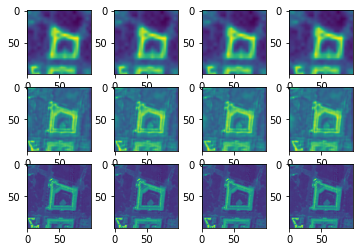

In [15]:
plt.figure()
for i in range(1,5,1):
    plt.subplot(3,4,i)
    plt.imshow(tem1[-i][:,:,0])
    plt.subplot(3,4,i+4)
    plt.imshow(model.predict(tem1[-i].reshape(1,100,100,195))[0,:,:,0])
    plt.subplot(3,4,i+8)
    plt.imshow(tem2[-i][:,:,0])
plt.show()